In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image

In [3]:
mpl.rcParams['text.usetex'] = True

In [105]:
def plot_3_lines(df, title):
    # Create figure and subplot manually
    # fig = plt.figure()
    # host = fig.add_subplot(111)

    # More versatile wrapper
    # fig, host = plt.subplots(figsize=(8,3), layout='constrained') # (width, height) in inches
    fig, host = plt.subplots(figsize=(12,6), layout='constrained') # (width, height) in inches
    # (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
    # .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)
        
    ax2 = host.twinx()
    # ax3 = host.twinx()
        
    # host.set_xlim(0, 0.40)
    # host.set_ylim(22, 35) # PSNR 
    # ax2.set_ylim(0.5, 1) # SSIM
    # ax3.set_ylim(0, 700) # MSE
        
    host.set_xlabel("$\lambda$", fontsize=25)
    host.set_ylabel("PSNR", fontsize=25)
    ax2.set_ylabel("SSIM", fontsize=25)
    # ax3.set_ylabel("MSE")

    # color1, color2, color3 = plt.cm.viridis([0, .5, .9])
    # color1, color2, color3 = "blue", "red", "green"
    # color1, color2, color3 = "blue", "red", "green"
    color1, color2 = "blue", "red"

    # df = df.head(40)

    p1 = host.plot(df["lambda"], df["psnr"], 
                   color=color1, 
                   label="PSNR")
    p2 = ax2.plot(df["lambda"], df["ssim"], 
                  color=color2, 
                  label="SSIM")
    # p3 = ax3.plot(df["lambda"], df["mse"], 
    #               color=color3, 
    #               label="MSE",
    #                alpha=0.8)

    # host.legend(
    #     # handles=p1+p2+p3, 
    #     handles=p1+p2, 
    #             # loc='best',
    #             loc='lower right',
    #             )

    # # right, left, top, bottom
    # ax3.spines['right'].set_position(('outward', 60))

    # # no x-ticks                 
    # host.xaxis.set_ticks([])

    # Alternatively (more verbose):
    # host.tick_params(
    #     axis='x',          # changes apply to the x-axis
    #     which='both',      # both major and minor ticks are affected
    #     bottom=False,      # ticks along the bottom edge are off)
    #     labelbottom=False) # labels along the bottom edge are off
    # sometimes handy:  direction='in'    

    # Move "Velocity"-axis to the left
    # ax3.spines['left'].set_position(('outward', 60))
    # ax3.spines['left'].set_visible(True)
    # ax3.spines['right'].set_visible(False)
    # ax3.yaxis.set_label_position('left')
    # ax3.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1[0].get_color())
    ax2.yaxis.label.set_color(p2[0].get_color())
    # ax3.yaxis.label.set_color(p3[0].get_color())

    host.tick_params(axis='x', labelsize=25, grid_in_layout=True)
    host.tick_params(axis='y', colors=p1[0].get_color(), labelsize=25)
    ax2.tick_params(axis='y', colors=p2[0].get_color(), labelsize=25)

    # For professional typesetting, e.g. LaTeX, use .pgf or .pdf
    # For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
    plt.savefig("pyplot_multiple_y-axis.PNG", bbox_inches='tight')
    # bbox_inches='tight': Try to strip excess whitespace
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html




def show_example():
    # base_results_path = "results/results_2024_06_09_23_16_40"
    # base_results_path = "results/results_2024_06_12_08_43_22"
    base_results_path = "results/results_2024_06_12_09_18_32"
    
    images_path = f"{base_results_path}/best_images"
    folders = os.listdir(images_path)
    folders = [int(folder) for folder in folders]
    folders.sort()
    # print(folders)
    # folder = folders[100]
    folder = folders[0]
    # folder = folders[145]
    # for folder in folders:
    for i in range(1):
        # print(f"folder: {folder}")
        folder_path = f"{images_path}/{folder}"

        csv_file = f"{folder_path}/lambda_vals.csv"
        df = pd.read_csv(csv_file)
        # print(df.head(20))
        plot_3_lines(df, "Metrics vs lambda")

        files = os.listdir(folder_path)
        images = []
        for file in files:
            if file.endswith("csv"):
                continue
            image = Image.open(os.path.join(folder_path, file))
            images.append((image, file))
        assert len(images) == 10
        # Swap the second and fourth
        images[1], images[3] = images[3], images[1]
        # Swap the third and fifth
        images[2], images[4] = images[4], images[2]

        # plt.figure(figsize=(15, 10))
        plt.figure(figsize=(12, 3))
        for i, (image, file) in enumerate(images):
            # plt.subplot(2, 3, i+1)
            plt.subplot(1, 4, i+1)
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            plt.title(file, fontsize=6)
            if i == 3:
                break
        plt.show();
        break

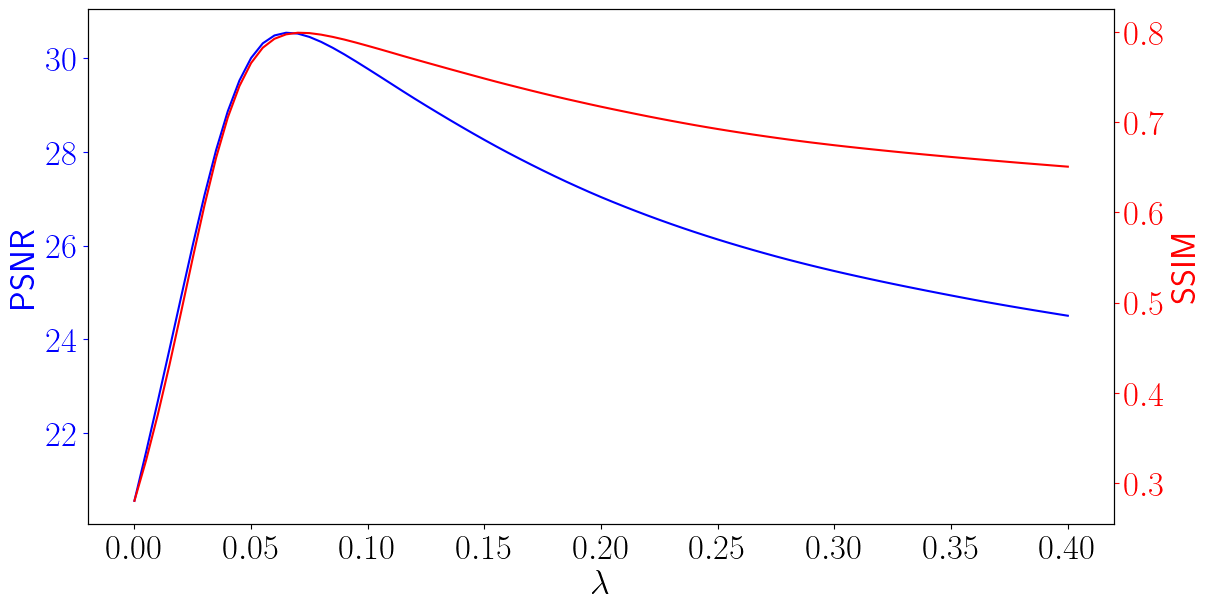

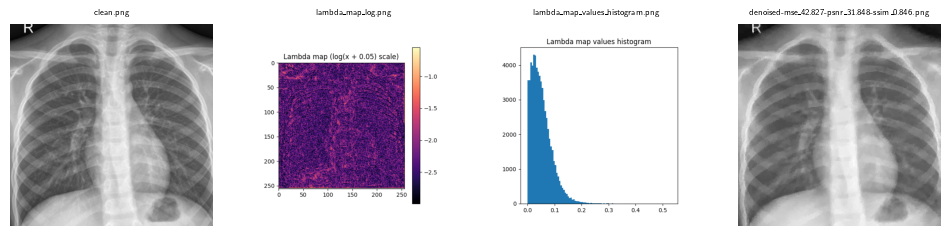

In [106]:
show_example()

In [50]:
def multi_box_plot(df):
    # # create random dataframe with different scales
    # df = pd.DataFrame(np.random.rand(30, 5), columns=['A', 'B', 'C', 'D', 'E'])
    # df['A'] *= 5
    # df['C'] *= 10
    # df['E'] *= 15

    # create boxplot with a different y scale for different rows
    # selection = ['A', 'C', 'E']
    # fig, axes = plt.subplots(1, len(selection))

    # Get the columns starting with "mse"
    df_mse = df.filter(regex='mse')
    df_psnr = df.filter(regex='psnr')
    df_ssim = df.filter(regex='ssim')

    # df_list = [df_mse, df_psnr, df_ssim]
    # labels = ["MSE", "PSNR", "SSIM"]

    df_list = [df_psnr, df_ssim]
    labels = ["PSNR", "SSIM"]

    fig, axes = plt.subplots(1, len(df_list), figsize=(8, 6))

    colors = ['blue', 'red', 'green']

    for i, df_metric in enumerate(df_list):
        ax = sns.boxplot(data=df_metric, 
                           ax=axes[i], 
                        #  color=colors[i],
                         )

        # Set font size
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xticklabels([f"scalar $\lambda$", r"$\mathbf{\Lambda}_\Theta$ map"])
        # Set font size for y label
        ax.set_ylabel(labels[i], fontsize=18)
        ax.set_ylim(df_metric.min().min(), df_metric.max().max())

    # Adjust the space between subplots
    plt.subplots_adjust(wspace=0.6)  # Increase the value of wspace to increase the space

    # # Make a list of 3 different colors
    # colors = ['blue', 'red', 'green', 'blue', 'red', 'green']
    # ids = [0, 2, 4, 1, 3, 5]
    
    # for i, col in enumerate(selection):
    #     ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], color=colors[i // 2])
    #     ax.set_ylim(df[col].min(), df[col].max())
    #     ax.set_ylabel(col + ' / Unit')
    #     # Increase horizontal space between subplots
    #     fig.tight_layout()
    #     # Set the color of the boxplot
    #     # ax.artists[0].set_facecolor(colors[i])
    #     # ax.set_facecolor(colors[i])


        
    plt.show()

def show_single_lambda_box_plot():
    # base_results_path = "results/results_2024_06_09_23_16_40"
    # base_results_path = "results/results_2024_06_12_08_43_22"
    base_results_path = "results/results_2024_06_14_23_09_23"
    single_lambda_csv_path = f"{base_results_path}/best_single_lambda.csv"

    df = pd.read_csv(single_lambda_csv_path)
    # print(df.head(20))

    # # Drop rows with mse < 10
    # df = df[df["mse"] > 10]
    # # Drop rows with mse > 20
    # df = df[df["mse"] < 20]
    # # Drop rows with PSNR > 50
    # df = df[df["psnr"] < 40]

    # # Histograms
    # plt.figure(figsize=(8, 5))
    # sns.histplot(df["mse_single"], bins=100)
    # plt.title("MSE histogram")
    # plt.show();

    # plt.figure(figsize=(8, 5))
    # sns.histplot(df["psnr_single"], bins=100)
    # plt.title("PSNR histogram")
    # plt.show();

    # plt.figure(figsize=(8, 5))
    # sns.histplot(df["ssim_single"], bins=100)
    # plt.title("SSIM histogram")
    # plt.show();



    # # Boxplot for mse
    # plt.figure(figsize=(8, 5))
    # sns.boxplot(y="mse_single", data=df)
    # plt.title("MSE vs lambda")
    # plt.show();

    # # Boxplot for psnr
    # plt.figure(figsize=(8, 5))
    # sns.boxplot(y="psnr_single", data=df)
    # plt.title("PSNR vs lambda")
    # plt.show();

    # # Boxplot for ssim
    # plt.figure(figsize=(8, 5))
    # sns.boxplot(y="ssim_single", data=df)
    # plt.title("SSIM vs lambda")
    # plt.show();

    # # Plot the box plots on the same figure
    # plt.figure(figsize=(8, 5))
    # # sns.boxplot(y="mse_single", data=df, color="blue")
    # # sns.boxplot(y="psnr_single", data=df, color="red")
    # # sns.boxplot(y="ssim_single", data=df, color="green")
    # # plt.title("Metrics vs lambda")
    # plt.boxplot([df["mse_single"], df["psnr_single"], df["ssim_single"]])
    # plt.xticks([1, 2, 3], ["MSE", "PSNR", "SSIM"])
    # plt.show();


    df_psnr = df.filter(regex='psnr')
    df_ssim = df.filter(regex='ssim')

    df_psnr_diff = df_psnr.diff(axis=1)
    df_ssim_diff = df_ssim.diff(axis=1)

    plt.figure(figsize=(9, 3))

    # Histograms of the differences
    # plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_psnr_diff,
                  bins=12,
                  legend=False,
                  color="green"
                  )
    # Set y-label to "Number of images"
    plt.ylabel("Number of images")
    # plt.title("PSNR difference histogram")
    plt.xlabel("PSNR difference")
    # plt.show();

    # plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 2)
    sns.histplot(df_ssim_diff, 
                 bins=12,
                    legend=False    ,
                    color="blue"
                 )
    # Set y-label to "Number of images"
    # plt.ylabel("Number of images")
    plt.ylabel("")
    # # Fix the bin size
    # plt.xticks(np.arange(-0.2, 0.2, 0.05))
    # plt.title("SSIM difference histogram")
    plt.xlabel("SSIM difference")
    plt.tight_layout()
    plt.show();


    mean_psnr = df_psnr.mean()
    mean_ssim = df_ssim.mean()

    std_psnr = df_psnr.std()
    std_ssim = df_ssim.std()

    # Make 2 columns: Scalar lambda and Lambda map
    # For each row, print the mean and std for each metric in format f"{mean:.2f} ± {std:.2f}"
    df_summary = pd.DataFrame()
    df_summary["Scalar lambda"] = [f"{mean_psnr['psnr_single']:.2f} ± {std_psnr['psnr_single']:.2f}",
                                   f"{mean_ssim['ssim_single']:.2f} ± {std_ssim['ssim_single']:.2f}"]
    df_summary["Lambda map"] = [f"{mean_psnr['psnr_map']:.2f} ± {std_psnr['psnr_map']:.2f}",
                                f"{mean_ssim['ssim_map']:.2f} ± {std_ssim['ssim_map']:.2f}"]
    # Make the index the metric names
    df_summary.index = ["PSNR", "SSIM"]

    print(df_summary)

    multi_box_plot(df)


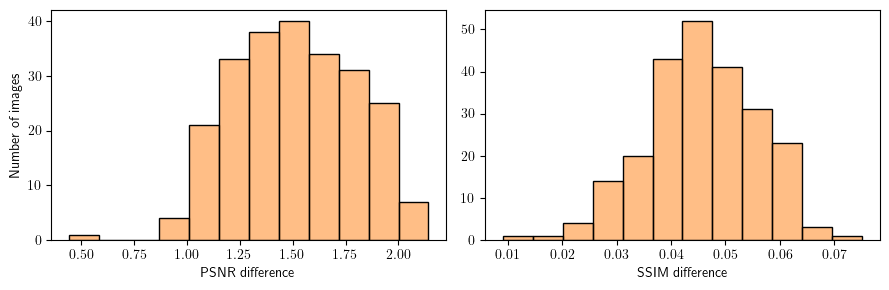

     Scalar lambda    Lambda map
PSNR  31.28 ± 1.39  32.79 ± 1.34
SSIM   0.82 ± 0.03   0.86 ± 0.02


/tmp/ipykernel_32523/1459043921.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"scalar $\lambda$", r"$\mathbf{\Lambda}_\Theta$ map"])
/tmp/ipykernel_32523/1459043921.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"scalar $\lambda$", r"$\mathbf{\Lambda}_\Theta$ map"])


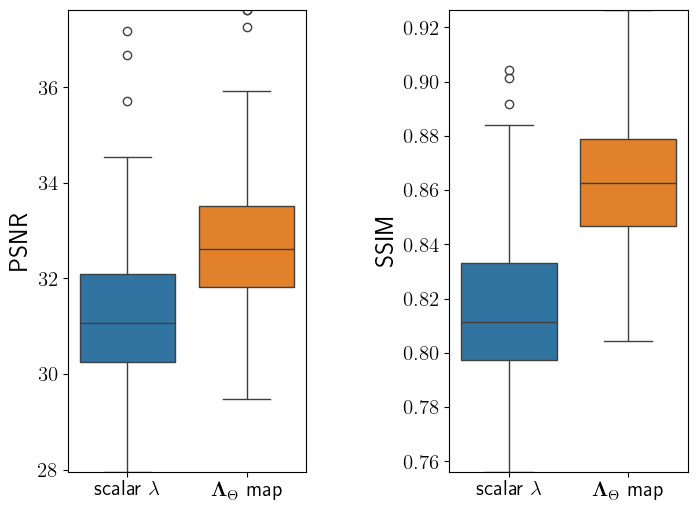

In [51]:
show_single_lambda_box_plot()